In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
import deeplake
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [18]:
ds = deeplake.load("hub://activeloop/mnist-train")

/

Opening dataset in read-only mode as you don't have write permissions.


/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/mnist-train



\

hub://activeloop/mnist-train loaded successfully.



In [3]:
labels = np.array(ds['labels'])

In [4]:
labels

array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], dtype=uint32)

In [5]:
images = np.array(ds['images'])

In [6]:
# Разбиение данных на тренировочный и тестовый наборы
mnist_train_X, mnist_test_X, mnist_train_y, mnist_test_y = train_test_split(images, labels, test_size=0.2, random_state=42)

In [7]:
mnist_train_X, mnist_test_X, mnist_train_y, mnist_test_y

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [8]:
mnist_train_X = mnist_train_X / 255
mnist_test_X = mnist_test_X / 255

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

In [13]:
# ЗАДАНИЕ 2

# Архитектура сверточного автоэнкодера
input_img = Input(shape=(28, 28, 1))  # Fashion MNIST - черно-белые изображения

# Энкодер
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Декодер
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

optimizer = Adam(learning_rate=0.01)
# Сборка автоэнкодера
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')

# Предполагается, что fashion_train и fashion_test имеют размерность (num_samples, 28, 28)
# Мы просто изменяем размерность данных для соответствия форме (num_samples, 28, 28, 1)
mnist_train = mnist_train_X.reshape(-1, 28, 28, 1)
mnist_test = mnist_test_X.reshape(-1, 28, 28, 1)

In [14]:
# Обучение автоэнкодера
autoencoder.fit(mnist_train[:1000], mnist_train[:1000],
                epochs=50,
                batch_size=256,
                validation_data=(mnist_test, mnist_test))


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 981ms/step - loss: 0.7498 - val_loss: 0.6326
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 868ms/step - loss: 0.5933 - val_loss: 0.4619
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 866ms/step - loss: 0.4525 - val_loss: 0.3742
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 870ms/step - loss: 0.3601 - val_loss: 0.3034
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 890ms/step - loss: 0.2915 - val_loss: 0.2419
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 917ms/step - loss: 0.2319 - val_loss: 0.1912
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 896ms/step - loss: 0.1854 - val_loss: 0.1688
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 945ms/step - loss: 0.1667 - val_loss: 0.1554
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 972ms/step - loss: 0.1539 - val_loss: 0.1423
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 971ms/step - loss: 0.1411 - val_loss: 0.1308
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 0.1313 - val_loss: 0.1223
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 0.1226 - val_loss: 0.

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


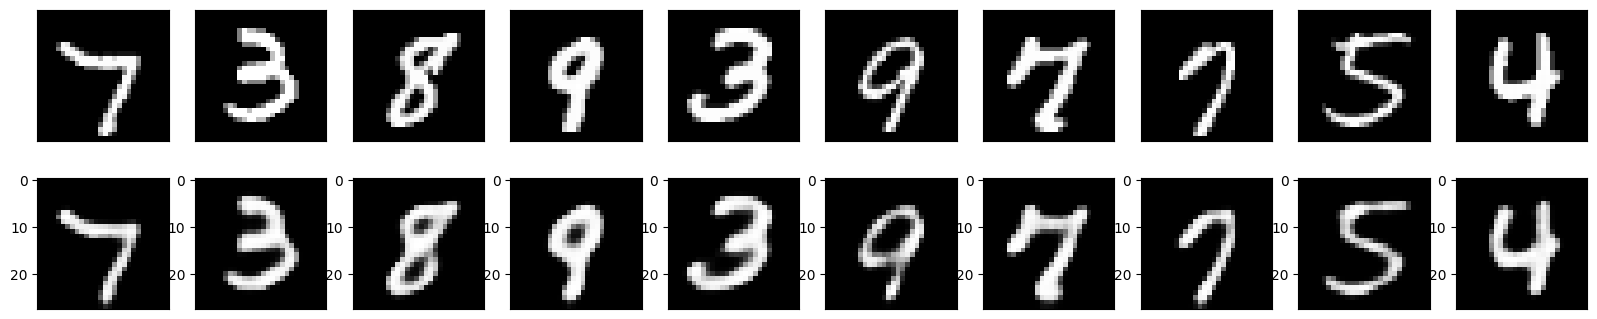

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Предсказание на тестовом наборе данных
decoded_imgs = autoencoder.predict(mnist_test)

n = 10  # количество изображений для отображения
plt.figure(figsize=(20, 4))

for i in range(n):
    # Отображение оригинальных изображений
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(mnist_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Отображение восстановленных изображений
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
#     ax.get_y

In [16]:
ds = deeplake.load('hub://activeloop/fashion-mnist-train')

|

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/fashion-mnist-train



/

hub://activeloop/fashion-mnist-train loaded successfully.



In [58]:
mnist = tf.keras.datasets.mnist 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
filtered_train_images = train_images[train_labels < 5]
filtered_test_images = test_images[test_labels < 5]
filtered_train_labels = train_labels[train_labels < 5]
filtered_test_labels = test_labels[test_labels < 5]

In [59]:
fashion_train_X = filtered_train_images / 255
fashion_test_X = filtered_test_images / 255

In [60]:
new_autoencoder = Model(input_img, decoded)
for layer in new_autoencoder.layers:
    layer.trainable = False

flattened = Flatten()(encoded)
x = Dense(128, activation='relu')(flattened)
predictions = Dense(5, activation='softmax')(x)

fashion_model = Model(input_img, predictions)
fashion_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
fashion_model.fit(fashion_train_X[:500], filtered_train_labels[:500], epochs=50, batch_size=256, validation_data=(fashion_test_X, filtered_test_labels))

# Предсказание
predictions = fashion_model.predict(fashion_test_X)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 761ms/step - accuracy: 0.2520 - loss: 1.6289 - val_accuracy: 0.6739 - val_loss: 1.3828
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step - accuracy: 0.7289 - loss: 1.3421 - val_accuracy: 0.8412 - val_loss: 1.1913
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step - accuracy: 0.8598 - loss: 1.1529 - val_accuracy: 0.8097 - val_loss: 1.0203
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step - accuracy: 0.8359 - loss: 0.9762 - val_accuracy: 0.8646 - val_loss: 0.8652
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step - accuracy: 0.8903 - loss: 0.8337 - val_accuracy: 0.9025 - val_loss: 0.7371
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step - accuracy: 0.9035 - loss: 0.7137 - val_accuracy: 0.9122 - val_loss: 0.6351
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 497ms/step - accuracy: 0.9101 - loss: 0.6159 - val_accuracy: 0.9163 - val_loss: 0.5510
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step - accuracy: 0.9061 - loss: 0.5324 - val_accuracy: 0.9191 - val_loss:

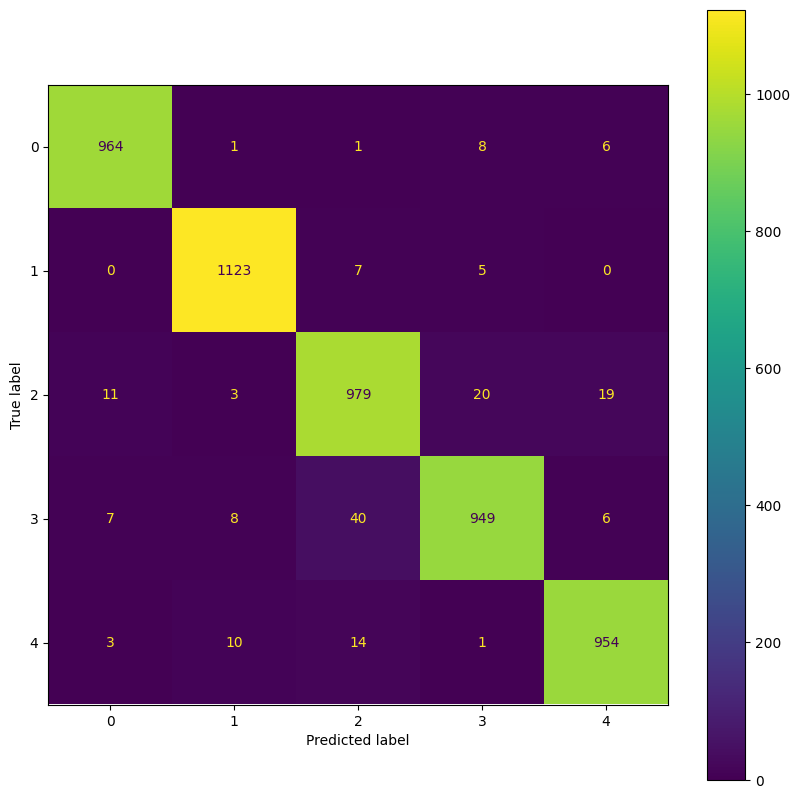

In [61]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Получаем предсказанные метки классов из вероятностных предсказаний
predicted_labels = np.argmax(predictions, axis=-1)

# Вычисляем confusion matrix
cm = confusion_matrix(filtered_test_labels, predicted_labels)

# Визуализируем confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay(cm, display_labels=[0, 1, 2, 3, 4]).plot(ax=ax)  # Измените метки классов, если у вас другие
plt.show()


In [62]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(filtered_test_labels, predicted_labels, average='macro')

# Print the metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Precision: 0.97
Recall: 0.97
F1-score: 0.97


In [66]:
from sklearn.metrics import classification_report

# Получаем отчет о классификации
report = classification_report(filtered_test_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.94      0.95      0.94      1032
           3       0.97      0.94      0.95      1010
           4       0.97      0.97      0.97       982

    accuracy                           0.97      5139
   macro avg       0.97      0.97      0.97      5139
weighted avg       0.97      0.97      0.97      5139



# Задание 1

In [71]:
ds = deeplake.load("hub://activeloop/mnist-train")

\

Opening dataset in read-only mode as you don't have write permissions.


|

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/mnist-train



|

hub://activeloop/mnist-train loaded successfully.



In [111]:
labels = np.array(ds['labels'])
images = np.array(ds['images'])
mnist_train_X, mnist_test_X, mnist_train_y, mnist_test_y = train_test_split(images, labels, test_size=0.2, random_state=42)

In [112]:
mnist_train_X = mnist_train_X / 255
mnist_test_X = mnist_test_X / 255

In [113]:
# Архитектура сверточного автоэнкодера
input_img = Input(shape=(28, 28, 1))  # Fashion MNIST - черно-белые изображения

# Энкодер
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Декодер
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
flattened = Flatten()(decoded)
out = Dense(10, activation='softmax')(flattened)

optimizer = Adam(learning_rate=0.001)
# Сборка автоэнкодера
autoencoder = Model(input_img, out)
autoencoder.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Предполагается, что fashion_train и fashion_test имеют размерность (num_samples, 28, 28)
# Мы просто изменяем размерность данных для соответствия форме (num_samples, 28, 28, 1)
mnist_train = mnist_train_X.reshape(-1, 28, 28, 1)
mnist_test = mnist_test_X.reshape(-1, 28, 28, 1)

In [114]:
mnist_train_y = tf.keras.utils.to_categorical(mnist_train_y, 10)
mnist_train_y
mnist_test_y = tf.keras.utils.to_categorical(mnist_test_y, 10)

In [115]:
autoencoder.fit(mnist_train[:1000], mnist_train_y[:1000],
                epochs=50,
                batch_size=256,
                validation_data=(mnist_test, mnist_test_y))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.0962 - loss: 2.3596 - val_accuracy: 0.1023 - val_loss: 2.3335
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 912ms/step - accuracy: 0.1198 - loss: 2.3111 - val_accuracy: 0.1503 - val_loss: 2.2652
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 949ms/step - accuracy: 0.2000 - loss: 2.2401 - val_accuracy: 0.3045 - val_loss: 2.1605
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 947ms/step - accuracy: 0.3203 - loss: 2.1128 - val_accuracy: 0.4153 - val_loss: 1.9880
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 940ms/step - accuracy: 0.4288 - loss: 1.9352 - val_accuracy: 0.5247 - val_loss: 1.7414
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 922ms/step - accuracy: 0.5185 - loss: 1.6770 - val_accuracy: 0.5773 - val_loss: 1.5108
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 920ms/step - accuracy: 0.6010 - loss: 1.4393 - val_accuracy: 0.6623 - val_loss: 1.3007
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 929ms/step - accuracy: 0.7018 - loss: 1.2337 - val_accuracy: 0.7450 - val_loss: 1.

In [116]:
predicted_labels = autoencoder.predict(mnist_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step


In [117]:
predicted_labels

array([[3.82636017e-06, 1.72816130e-04, 1.42675590e-05, ...,
        9.87030923e-01, 5.91221091e-04, 4.71739843e-03],
       [1.19154203e-04, 2.22531999e-05, 1.29992710e-04, ...,
        5.65597948e-05, 2.74087834e-05, 1.13973429e-05],
       [1.09420577e-03, 6.60721416e-05, 6.92333735e-04, ...,
        6.11546566e-05, 9.89002228e-01, 4.43332130e-04],
       ...,
       [1.12264475e-04, 1.55776725e-04, 1.29165892e-05, ...,
        1.19385996e-03, 8.76444578e-03, 9.62774396e-01],
       [3.13195027e-03, 2.19851900e-05, 6.51563678e-05, ...,
        5.26794136e-01, 1.80061953e-03, 4.65376556e-01],
       [1.14780013e-03, 2.31757112e-05, 9.90161419e-01, ...,
        1.40454038e-03, 3.22454260e-04, 3.58355537e-05]], dtype=float32)

In [119]:
mnist_test_y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [127]:
from sklearn.metrics import classification_report

prediction_y = np.argmax(predicted_labels, axis=-1)
mnist_test_y_1 = np.argmax(mnist_test_y, axis=-1)
# Получаем отчет о классификации
report = classification_report(mnist_test_y_1, prediction_y)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1175
           1       0.98      0.98      0.98      1322
           2       0.94      0.93      0.93      1174
           3       0.95      0.92      0.93      1219
           4       0.97      0.94      0.95      1176
           5       0.95      0.92      0.93      1104
           6       0.96      0.98      0.97      1177
           7       0.93      0.97      0.95      1299
           8       0.90      0.94      0.92      1160
           9       0.92      0.92      0.92      1194

    accuracy                           0.95     12000
   macro avg       0.95      0.95      0.95     12000
weighted avg       0.95      0.95      0.95     12000



In [125]:
prediction_y

array([7, 3, 8, ..., 9, 7, 2], dtype=int64)

In [126]:
mnist_test_y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [128]:
new_autoencoder_fashion = Model(input_img, autoencoder.layers[-1].output)
for layer in new_autoencoder_fashion.layers:
    layer.trainable = False

x = Dense(128, activation='relu')(flattened)
predictions = Dense(5, activation='softmax')(x)

fashion_model_from_numbers = Model(input_img, predictions)
fashion_model_from_numbers.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
fashion_model_from_numbers.fit(fashion_train_X[:500], filtered_train_labels[:500], epochs=50, batch_size=256, validation_data=(fashion_test_X, filtered_test_labels))

# Предсказание
predictions_from_numbers = fashion_model_from_numbers.predict(fashion_test_X)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.4693 - loss: 1.3916 - val_accuracy: 0.7488 - val_loss: 0.7978
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8270 - loss: 0.6675 - val_accuracy: 0.9323 - val_loss: 0.3946
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9497 - loss: 0.3117 - val_accuracy: 0.9774 - val_loss: 0.2064
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9828 - loss: 0.1743 - val_accuracy: 0.9780 - val_loss: 0.1459
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9802 - loss: 0.1268 - val_accuracy: 0.9813 - val_loss: 0.1011
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9881 - loss: 0.0883 - val_accuracy: 0.9813 - val_loss: 0.0773
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9854 - loss: 0.0695 - val_accuracy: 0.9831 - val_loss: 0.0681
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9841 - loss: 0.0586 - val_accuracy: 0.9823 - val_loss: 0.0638
Epoch 9/50
2/2 ━

In [129]:
predictions_from_numbers

array([[2.4483036e-04, 2.9581110e-04, 9.9939477e-01, 6.3976440e-05,
        6.2702185e-07],
       [3.7931730e-07, 9.9993348e-01, 1.0779216e-05, 1.6683859e-07,
        5.5273671e-05],
       [9.9999225e-01, 5.4356542e-07, 3.5600010e-06, 7.1906790e-08,
        3.6111899e-06],
       ...,
       [6.0395126e-07, 4.6429665e-05, 9.9994695e-01, 6.0259094e-06,
        6.7574661e-09],
       [1.5320422e-04, 3.6951122e-04, 1.5115135e-03, 9.9796534e-01,
        4.2553376e-07],
       [9.2967589e-08, 3.6488529e-04, 7.0191857e-07, 7.5221990e-08,
        9.9963415e-01]], dtype=float32)

In [134]:
prediction_fashion_y = np.argmax(predictions_from_numbers, axis=-1)
# Получаем отчет о классификации
report = classification_report(filtered_test_labels, prediction_fashion_y)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.99      0.99       982

    accuracy                           0.98      5139
   macro avg       0.98      0.98      0.98      5139
weighted avg       0.98      0.98      0.98      5139



In [133]:
filtered_test_labels

array([2, 1, 0, ..., 2, 3, 4], dtype=uint8)

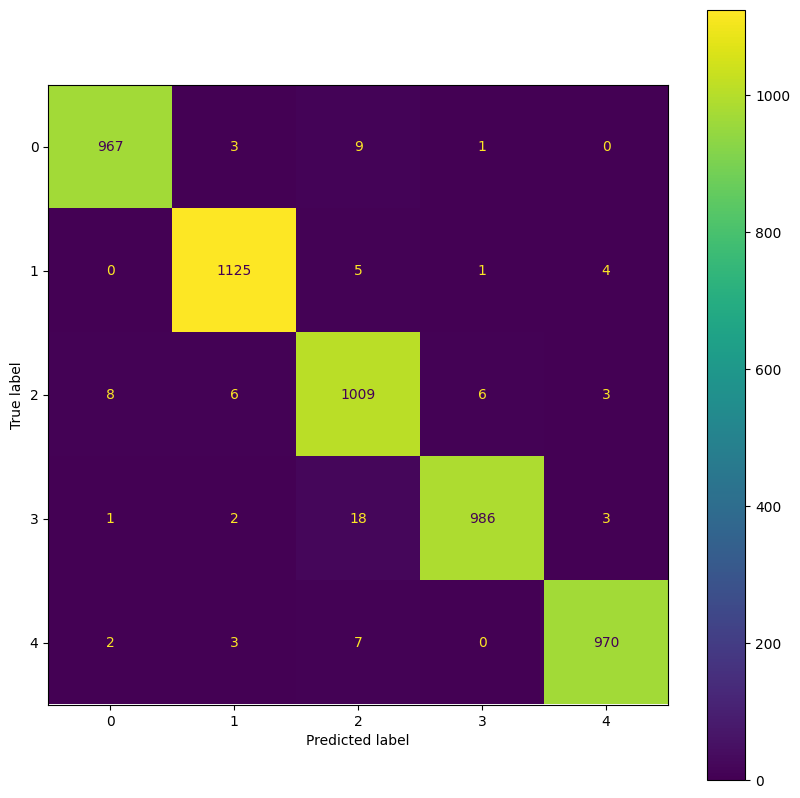

In [135]:
# Вычисляем confusion matrix
cm = confusion_matrix(filtered_test_labels, prediction_fashion_y)

# Визуализируем confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay(cm, display_labels=[0, 1, 2, 3, 4]).plot(ax=ax)  # Измените метки классов, если у вас другие
plt.show()

# Задание 3

In [2]:
# Загрузка и предобработка данных
(mnist_train_X, mnist_train_y), (mnist_test_X, mnist_test_y) = tf.keras.datasets.mnist.load_data()

# Нормализация данных
mnist_train = mnist_train_X.astype('float32') / 255.
mnist_test = mnist_test_X.astype('float32') / 255.

mnist_train = mnist_train.reshape(-1, 28, 28, 1)
mnist_test = mnist_test.reshape(-1, 28, 28, 1)

# Архитектура автоэнкодера
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
encoded = Dense(128, activation='relu')(x)

x = Dense(256, activation='relu')(encoded)
x = Dense(512, activation='relu')(x)
x = Dense(28*28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x)

autoencoder = Model(input_img, decoded)

optimizer = Adam(learning_rate=0.001)
# Обучение автоэнкодера на notMNIST
autoencoder.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])
autoencoder.fit(mnist_train,
                mnist_train,
                epochs=50,
                batch_size=512,
                validation_data=(mnist_test, mnist_test))


Epoch 1/50
118/118 [==============================] - 10s 67ms/step - loss: 0.0644 - accuracy: 0.7871 - val_loss: 0.0325 - val_accuracy: 0.8070
Epoch 2/50
118/118 [==============================] - 6s 54ms/step - loss: 0.0240 - accuracy: 0.8093 - val_loss: 0.0180 - val_accuracy: 0.8111
Epoch 3/50
118/118 [==============================] - 6s 51ms/step - loss: 0.0160 - accuracy: 0.8125 - val_loss: 0.0140 - val_accuracy: 0.8118
Epoch 4/50
118/118 [==============================] - 7s 55ms/step - loss: 0.0128 - accuracy: 0.8136 - val_loss: 0.0116 - val_accuracy: 0.8128
Epoch 5/50
118/118 [==============================] - 7s 56ms/step - loss: 0.0110 - accuracy: 0.8141 - val_loss: 0.0104 - val_accuracy: 0.8131
Epoch 6/50
118/118 [==============================] - 7s 58ms/step - loss: 0.0098 - accuracy: 0.8144 - val_loss: 0.0094 - val_accuracy: 0.8136
Epoch 7/50
118/118 [==============================] - 6s 54ms/step - loss: 0.0090 - accuracy: 0.8146 - val_loss: 0.0083 - val_accuracy: 0.813

313/313 [==============================] - 2s 8ms/step


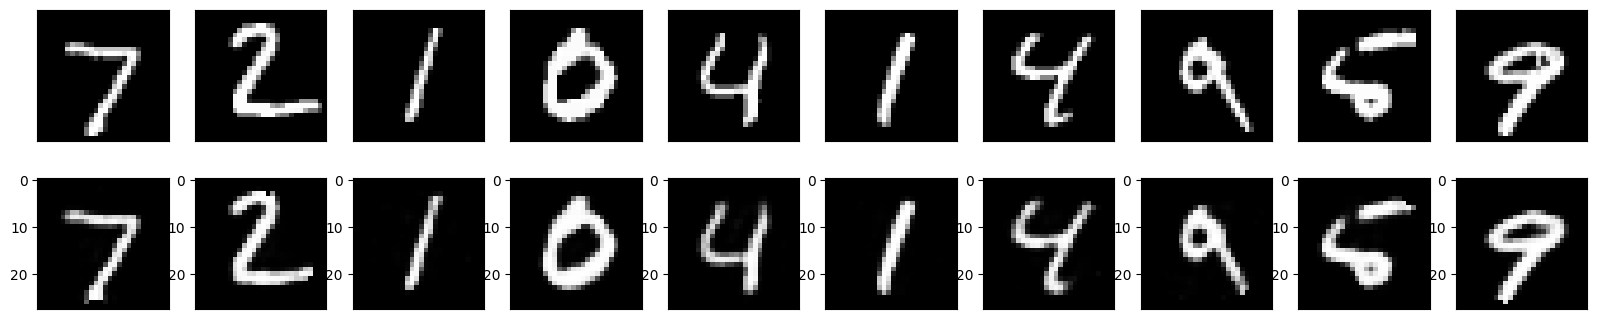

In [4]:
import matplotlib.pyplot as plt


# Предсказание на тестовом наборе данных
decoded_imgs = autoencoder.predict(mnist_test)

n = 10  # количество изображений для отображения
plt.figure(figsize=(20, 4))

for i in range(n):
    # Отображение оригинальных изображений
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(mnist_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Отображение восстановленных изображений
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)

# Задание 2 Pipeline

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
import deeplake

In [19]:
class DataLoader(BaseEstimator, TransformerMixin):
    def __init__(self, dataset_name):
        self.dataset_name = dataset_name
    
    def fit(self, X=None, y=None):
        return self
    
    def transform(self, X=None, y=None):
        ds = deeplake.load(self.dataset_name)
        labels = np.array(ds['labels']).squeeze()
        images = np.array(ds['images'])
        return train_test_split(images, labels, test_size=0.2, random_state=42)

In [20]:
class Autoencoder(BaseEstimator, TransformerMixin):
    def __init__(self, input_shape=(28, 28, 1), learning_rate=0.01, epochs=50, batch_size=256):
        self.input_shape = input_shape
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.autoencoder = self.build_model()
    
    def build_model(self):
        input_img = Input(shape=self.input_shape)
        
        # Encoder
        x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
        x = MaxPooling2D((2, 2), padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        encoded = MaxPooling2D((2, 2), padding='same')(x)
        
        # Decoder
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
        x = UpSampling2D((2, 2))(x)
        x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
        x = UpSampling2D((2, 2))(x)
        decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
        
        autoencoder = Model(input_img, decoded)
        optimizer = Adam(learning_rate=self.learning_rate)
        autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')
        return autoencoder
    
    def fit(self, X, y=None):
        X_train, X_test, _, _ = X
        X_train = X_train / 255.0
        X_test = X_test / 255.0
        X_train = X_train.reshape(-1, 28, 28, 1)
        X_test = X_test.reshape(-1, 28, 28, 1)
        self.autoencoder.fit(X_train[:1000], X_train[:1000], epochs=self.epochs, batch_size=self.batch_size, validation_data=(X_test, X_test))
        return self
    
    def transform(self, X):
        return self.autoencoder

In [21]:
class Classifier(BaseEstimator, TransformerMixin):
    def __init__(self, input_shape=(28, 28, 1), epochs=50, batch_size=256):
        self.input_shape = input_shape
        self.epochs = epochs
        self.batch_size = batch_size
        self.classifier = None
        self.autoencoder = None
    
    def build_model(self):
        for layer in self.autoencoder.layers:
            layer.trainable = False
        
        input_img = Input(shape=self.input_shape)
        encoded = self.autoencoder.layers[-5].output  # Assuming the encoded layer is the 5th from last
        flattened = Flatten()(encoded)
        x = Dense(128, activation='relu')(flattened)
        predictions = Dense(5, activation='softmax')(x)
        
        classifier = Model(self.autoencoder.input, predictions)
        classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return classifier
    
    def fit(self, X, y=None):
        fashion_train_X, fashion_test_X, fashion_train_y, fashion_test_y = X
        self.classifier = self.build_model()
        
        fashion_train_X = fashion_train_X / 255.0
        fashion_test_X = fashion_test_X / 255.0
        fashion_train_X = fashion_train_X.reshape(-1, 28, 28, 1)
        fashion_test_X = fashion_test_X.reshape(-1, 28, 28, 1)
        
        self.classifier.fit(fashion_train_X[:500], fashion_train_y[:500], epochs=self.epochs, batch_size=self.batch_size, validation_data=(fashion_test_X, fashion_test_y))
        return self
    
    def transform(self, X):
        fashion_test_X = X[1]
        fashion_test_X = fashion_test_X / 255.0
        fashion_test_X = fashion_test_X.reshape(-1, 28, 28, 1)
        return self.classifier.predict(fashion_test_X)
    
    def set_autoencoder(self, autoencoder):
        self.autoencoder = autoencoder

In [22]:
def filter_fashion_data(X):
    train_images, test_images, train_labels, test_labels = X
    filtered_train_images = train_images[train_labels < 5]
    filtered_test_images = test_images[test_labels < 5]
    filtered_train_labels = train_labels[train_labels < 5]
    filtered_test_labels = test_labels[test_labels < 5]
    return filtered_train_images, filtered_test_images, filtered_train_labels, filtered_test_labels

In [25]:
def set_autoencoder_in_classifier(X):
    if X is None:
        return None
    classifier = X
    autoencoder = classifier.named_steps['autoencoder'].transform(None)
    classifier.set_autoencoder(autoencoder)
    return classifier

In [24]:
pipeline = Pipeline([
    ('mnist_loader', DataLoader("hub://activeloop/mnist-train")),
    ('autoencoder', Autoencoder()),
    ('fashion_loader', DataLoader("hub://activeloop/fashion-mnist-train")),
    ('fashion_filter', FunctionTransformer(filter_fashion_data, validate=False)),
    ('set_autoencoder', FunctionTransformer(set_autoencoder_in_classifier, validate=False)),
    ('classifier', Classifier())
])

pipeline.fit(None)

-

Opening dataset in read-only mode as you don't have write permissions.


This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/mnist-train



/

hub://activeloop/mnist-train loaded successfully.



Epoch 1/50
4/4 [==============================] - 8s 2s/step - loss: 0.6915 - val_loss: 0.6107
Epoch 2/50
4/4 [==============================] - 7s 2s/step - loss: 0.5239 - val_loss: 0.4135
Epoch 3/50
4/4 [==============================] - 7s 2s/step - loss: 0.3719 - val_loss: 0.3123
Epoch 4/50
4/4 [==============================] - 7s 2s/step - loss: 0.2741 - val_loss: 0.2137
Epoch 5/50
4/4 [==============================] - 7s 2s/step - loss: 0.1982 - val_loss: 0.1819
Epoch 6/50
4/4 [==============================] - 6s 2s/step - loss: 0.1780 - val_loss: 0.1602
Epoch 7/50
4/4 [==============================] - 6s 2s/step - loss: 0.1572 - val_loss: 0.1449
Epoch 8/50
4/4 [==============================] - 6s 2s/step - loss: 0.1421 - val_loss: 0.1337
Epoch 9/50
4/4 [==============================] - 6s 2s/step - loss: 0.1320 - val_loss: 0.1253
Epoch 10/50
4/4 [==============================] - 7s 2s/step - loss: 0.1236 - val_loss: 0.1189
Epoch 11/50
4/4 [==============================] 

Opening dataset in read-only mode as you don't have write permissions.


|

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/fashion-mnist-train



\

hub://activeloop/fashion-mnist-train loaded successfully.



ValueError: too many values to unpack (expected 2)

## Pipeline